In [19]:
# Import necessary libraries
import pandas as pd
import hvplot.pandas
from pathlib import Path
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [20]:
#Read the file 
data = pd.read_csv(Path("Developed_nations.csv"), 
    index_col="Country"
)
data.head()

,Year,Happiness Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,CPI %,Unemployment Rate,region,Development_Status
Country,,,,,,,,,,,,
Argentina,2010,6.441,10.066,0.927,66.30,0.730,-0.129,0.855,0.0,7.71,South America,Developed
Argentina,2011,6.776,10.112,0.889,66.42,0.816,-0.178,0.755,0.0,7.18,South America,Developed
Argentina,2012,6.468,10.091,0.902,66.54,0.747,-0.151,0.817,0.0,7.22,South America,Developed
Argentina,2013,6.582,10.103,0.910,66.66,0.737,-0.134,0.823,0.0,7.10,South America,Developed
Argentina,2014,6.671,10.067,0.918,66.78,0.745,-0.168,0.854,0.0,7.27,South America,Developed


In [21]:

 # Scaling the numeric columns
Happiness_data_scaled = StandardScaler().fit_transform(data[['Happiness Score','Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'CPI %', 'Unemployment Rate']])

# Creating a DataFrame with with the scaled data
#df_happiness_transformed = pd.DataFrame(Happiness_data_scaled, columns=['Happiness Score','Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'CPI %', 'Unemployment Rate'])

# Display sample data
Happiness_data_scaled[0:5]

array([[-0.14023202, -0.66575041,  0.39768131, -0.19899708, -0.62544574,
        -0.85269376,  0.97694605, -0.49971799,  0.14567722],
       [ 0.28834494, -0.60705288, -0.06640743, -0.18646074,  0.02297267,
        -1.1351238 ,  0.62074678, -0.49971799,  0.03422191],
       [-0.10569   , -0.63384958,  0.09235977, -0.1739244 , -0.49727   ,
        -0.97949908,  0.84159033, -0.49971799,  0.04263363],
       [ 0.0401541 , -0.61853718,  0.19006266, -0.16138805, -0.57266749,
        -0.88151315,  0.86296228, -0.49971799,  0.01739846],
       [ 0.15401485, -0.66447438,  0.28776555, -0.14885171, -0.5123495 ,
        -1.07748501,  0.97338405, -0.49971799,  0.05314828]])

In [22]:
# Create a DataFrame called with the scaled data
# The column names should match those referenced in the StandardScaler step
# Creating a DataFrame with with the scaled data
df_happiness_transformed = pd.DataFrame(Happiness_data_scaled, columns=['Happiness Score','Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'CPI %', 'Unemployment Rate'])


# Create a Ticker column in the df_stocks_scaled DataFrame
# using the index of the original df_stocks DataFrame
df_happiness_transformed["Country"] = data.index

# Set the newly created Ticker column as index of the df_stocks_scaled DataFrame
df_happiness_transformed = df_happiness_transformed.set_index("Country")

# Review the DataFrame
df_happiness_transformed.head()

,Happiness Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,CPI %,Unemployment Rate
Country,,,,,,,,,
Argentina,-0.140232,-0.665750,0.397681,-0.198997,-0.625446,-0.852694,0.976946,-0.499718,0.145677
Argentina,0.288345,-0.607053,-0.066407,-0.186461,0.022973,-1.135124,0.620747,-0.499718,0.034222
Argentina,-0.105690,-0.633850,0.092360,-0.173924,-0.497270,-0.979499,0.841590,-0.499718,0.042634
Argentina,0.040154,-0.618537,0.190063,-0.161388,-0.572667,-0.881513,0.862962,-0.499718,0.017398
Argentina,0.154015,-0.664474,0.287766,-0.148852,-0.512350,-1.077485,0.973384,-0.499718,0.053148


In [23]:
# Transform the Card Type column using get_dummies()
columns_to_encode = ['Year','region', 'Development_Status']
df_dummies = pd.get_dummies(data[columns_to_encode])

# Display sample data
df_dummies.head()

,Year,region_Asia,region_Australian and Oceania,region_Eastern Europe,region_Middle East,region_North America,region_South America,region_Western Europe,Development_Status_Developed
Country,,,,,,,,,
Argentina,2010,0,0,0,0,0,1,0,1
Argentina,2011,0,0,0,0,0,1,0,1
Argentina,2012,0,0,0,0,0,1,0,1
Argentina,2013,0,0,0,0,0,1,0,1
Argentina,2014,0,0,0,0,0,1,0,1


In [24]:
 # Concatenate the df_shopping_transformed and the card_dummies DataFrames
df_happiness_transformed = pd.concat([df_happiness_transformed, df_dummies], axis=1)

# Display sample data
df_happiness_transformed.head(20)

,Happiness Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,CPI %,Unemployment Rate,Year,region_Asia,region_Australian and Oceania,region_Eastern Europe,region_Middle East,region_North America,region_South America,region_Western Europe,Development_Status_Developed
Country,,,,,,,,,,,,,,,,,,
Argentina,-0.140232,-0.665750,0.397681,-0.198997,-0.625446,-0.852694,0.976946,-0.499718,0.145677,2010,0,0,0,0,0,1,0,1
Argentina,0.288345,-0.607053,-0.066407,-0.186461,0.022973,-1.135124,0.620747,-0.499718,0.034222,2011,0,0,0,0,0,1,0,1
Argentina,-0.105690,-0.633850,0.092360,-0.173924,-0.497270,-0.979499,0.841590,-0.499718,0.042634,2012,0,0,0,0,0,1,0,1
Argentina,0.040154,-0.618537,0.190063,-0.161388,-0.572667,-0.881513,0.862962,-0.499718,0.017398,2013,0,0,0,0,0,1,0,1
Argentina,0.154015,-0.664474,0.287766,-0.148852,-0.512350,-1.077485,0.973384,-0.499718,0.053148,2014,0,0,0,0,0,1,0,1
Argentina,0.187278,-0.644058,0.385468,-0.136315,0.513056,-1.135124,0.962698,-0.499718,-1.475682,2015,0,0,0,0,0,1,0,1
Argentina,-0.158143,-0.684891,-0.139685,-0.131092,0.264245,-1.233110,0.962698,-0.499718,-1.475682,2016,0,0,0,0,0,1,0,1
Argentina,-0.654524,-0.661922,0.153424,-0.125868,0.143609,-1.204290,0.927078,-0.499718,0.280265,2017,0,0,0,0,0,1,0,1
Argentina,-0.969241,-0.709136,0.067934,-0.120645,0.249165,-1.342623,0.976946,5.619795,0.463220,2018,0,0,0,0,0,1,0,1


In [25]:
# Define your independent variables (features) and the dependent variable (happiness scores)
X = df_happiness_transformed.drop(['Happiness Score'], axis=1).values


y = df_happiness_transformed['Happiness Score'].values

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [27]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
#Prediction of test set
y_pred = model.predict(X_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 0.8134537   0.94717037  0.3961735   0.4618227  -0.72865501  0.98467536
 -0.57387452  0.91576074 -0.39314404 -0.12859324  0.34526312 -0.19806285
  0.80899043 -1.13687841 -0.80096892 -0.01138259  0.76109445 -0.36453292
 -2.50212947  0.38668237  0.80450422 -0.16514918 -0.67662386  0.39188843
  0.80042854  0.79484392  0.89728524 -0.74158988  0.78457144  1.22191222
 -0.47205    -0.9463487  -2.37026189  0.00449968 -0.2787874   1.05640455
 -1.94301725  1.03366271 -2.24657694  0.65474628 -2.13653304  0.84156747
  0.7467748   0.52844704 -1.51631969 -0.86549569 -0.67839134  0.14417855
 -0.31646819  0.00290918 -2.03537855  0.17074681  0.42771576  0.74242406
  1.01630864  0.4416343  -0.22662412  1.00181292 -0.67846477 -0.77328544
  1.00342172 -0.53287427 -0.43091712  0.41495105  1.12913048 -0.67744682
 -0.30729981 -0.67719483 -0.41459732  0.77164003 -0.87094796 -0.53595012
 -0.13422869  0.41070677 -0.57317086 -0.18810455  0.30358923 -0.05534123
  1.0959859  -0.15878596  

In [29]:
#Actual value and the predicted value
model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred, 'Difference': y_test-y_pred})
model_diff[0:20]

,Actual value,Predicted value,Difference
0,0.532698,0.813454,-0.280756
1,1.233773,0.947170,0.286603
2,0.677263,0.396174,0.281089
3,0.482804,0.461823,0.020981
4,-1.410611,-0.728655,-0.681956
5,1.561282,0.984675,0.576607
6,-0.631496,-0.573875,-0.057622
7,0.825665,0.915761,-0.090095
8,-0.476697,-0.393144,-0.083553
9,-0.043003,-0.128593,0.085591


In [30]:
# Create a copy of the original data
df_happiness_predicted =df_happiness_transformed.copy()

# Add a column with the predicted values
df_happiness_predicted['Predicted Happiness Score'] = model.predict(X)

# Display sample data
print(df_happiness_predicted)

               Happiness Score  Log GDP per capita  Social support  \
Country                                                              
Argentina            -0.140232           -0.665750        0.397681   
Argentina             0.288345           -0.607053       -0.066407   
Argentina            -0.105690           -0.633850        0.092360   
Argentina             0.040154           -0.618537        0.190063   
Argentina             0.154015           -0.664474        0.287766   
...                        ...                 ...             ...   
United States         0.425234            0.556689        0.116785   
United States         0.503273            0.580934        0.275553   
United States         0.610737            0.532445        0.519810   
United States         0.522463            0.603903        0.312191   
United States         0.182160            0.626871        0.067934   

               Healthy life expectancy at birth  Freedom to make life choices  \
Country 

In [31]:
# Create a new column for colors based on different conditions
df_happiness_predicted["Color"] = "blue"  # Default to blue
df_happiness_predicted.loc[
    df_happiness_predicted["Predicted Happiness Score"] > df_happiness_predicted["Happiness Score"],
    "Color"
] = "red"  # Set to red when predicted is greater

# Create the scatter chart with different colors for x and y values
scatter_chart = df_happiness_predicted.hvplot.scatter(
    x="Happiness Score",
    y="Predicted Happiness Score",
    by=["Country"],
    c="Color",  # Use the "Color" column for colors
    cmap=["blue", "red"],  # Specify the colors for "blue" and "red"
)

scatter_chart

:NdOverlay   [Country]
   :Scatter   [Happiness Score]   (Predicted Happiness Score,Color)

In [32]:
scatter_chart = df_happiness_predicted.hvplot.scatter(
    x="Happiness Score",
    y="Predicted Happiness Score",
    by=["Country"],
    color=["red"]  # Specify the colors for the categories
    
)
scatter_chart

:NdOverlay   [Country]
   :Scatter   [Happiness Score]   (Predicted Happiness Score)

In [33]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [34]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.1591784278233005
R-squared: 0.841337320061079


In [35]:
# Get the coefficients of the model
coefficients = model.coef_

# Display the coefficients along with their corresponding feature names
feature_names = df_happiness_transformed.drop(['Happiness Score'], axis=1).columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coefficients_df.head(8)

,Feature,Coefficient
0,Log GDP per capita,0.085125
1,Social support,0.279920
2,Healthy life expectancy at birth,0.216557
3,Freedom to make life choices,0.092699
4,Generosity,0.138025
5,Perceptions of corruption,-0.168597
6,CPI %,-0.095736
7,Unemployment Rate,-0.249118


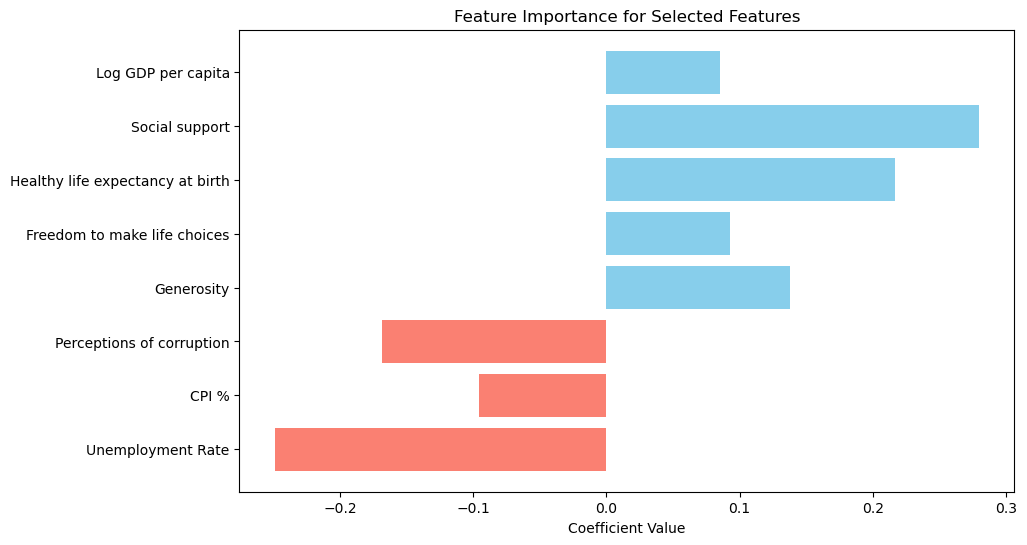

In [40]:
import matplotlib.pyplot as plt  # Import Matplotlib

# Absolute values of coefficients for feature importance
abs_coefficients = np.abs(coefficients)

# Define the selected feature names
selected_features = [
    "Log GDP per capita",
    "Social support",
    "Healthy life expectancy at birth",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption",
    "CPI %",
    "Unemployment Rate"
]

# Filter the coefficients and feature names for selected features
selected_coefficients = []
for feature in selected_features:
    index = feature_names.get_loc(feature)
    selected_coefficients.append(coefficients[index])

# Create a list of colors based on positive and negative coefficients
colors = ['skyblue' if coef >= 0 else 'salmon' for coef in selected_coefficients]

# Create a bar chart to visualize feature importance for selected features
plt.figure(figsize=(10, 6))
plt.barh(selected_features, selected_coefficients, color=colors)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance for Selected Features')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()
